# Preprocessing

## Denoising Function 1: fastN1Means Denoising

In [ ]:
def FastN1MeansDenoising(h,templateWindowSize,searchWindowSize):
  return cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)


## Denoising Function 2: bm3d Denoising


In [ ]:
def BM3D_Denoising(sigma):
  if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  else:
        gray_image = image

    # Apply BM3D denoising
  denoised_image = bm3d.bm3d(gray_image, sigma_psd=sigma, stage_arg=bm3d.BM3DStages.ALL_STAGES)
  return denoised_image

##Histogram Equalization Function 1: CLAHE





In [33]:
def CLAHE(image,clipLimit,GridSize):
  clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(10, 10))
  return clahe.apply(image)

## Deblurring Function 1: Richardson Lucy

In [ ]:
import numpy as np
import cv2
from scipy.signal import convolve2d

def richardson_lucy_blind_deconvolution_psf(image, num_iterations=10, psf_size=(5, 5)):
    # Initialize the PSF and deblurred image
    psf = np.ones(psf_size) / np.prod(psf_size)
    deblurred_image = image.copy()

    for _ in range(num_iterations):
        # Estimate the blurred image using the current PSF
        blurred_estimate = convolve2d(deblurred_image, psf, 'same', 'symm')

        # Compute the error between the original image and the blurred estimate
        error = image / (blurred_estimate + 1e-10)

        # Update the deblurred image
        deblurred_image *= convolve2d(error, psf[::-1, ::-1], 'same', 'symm')

        # Update the PSF
        psf_update = convolve2d(image / (convolve2d(deblurred_image, psf, 'same', 'symm') + 1e-10),
                                deblurred_image[::-1, ::-1], 'full', 'symm')
        psf_update = psf_update[:psf_size[0], :psf_size[1]]
        psf += psf_update

        # Normalize the PSF to ensure it sums to 1
        psf /= np.sum(psf)

    return deblurred_image, psf

#Crack Fixing

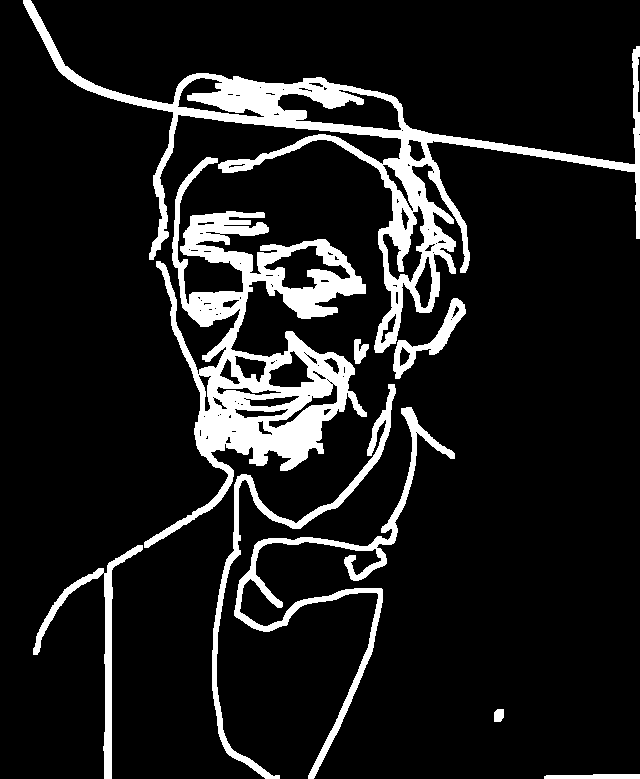

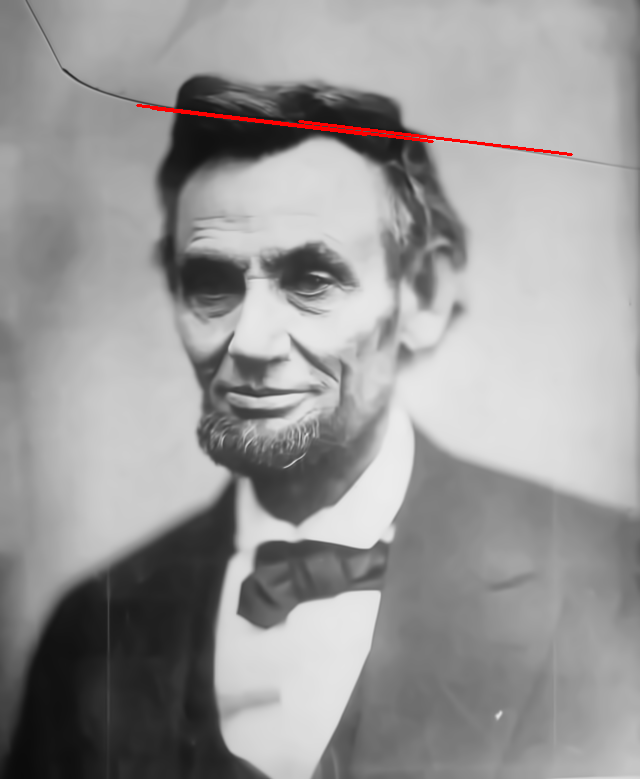

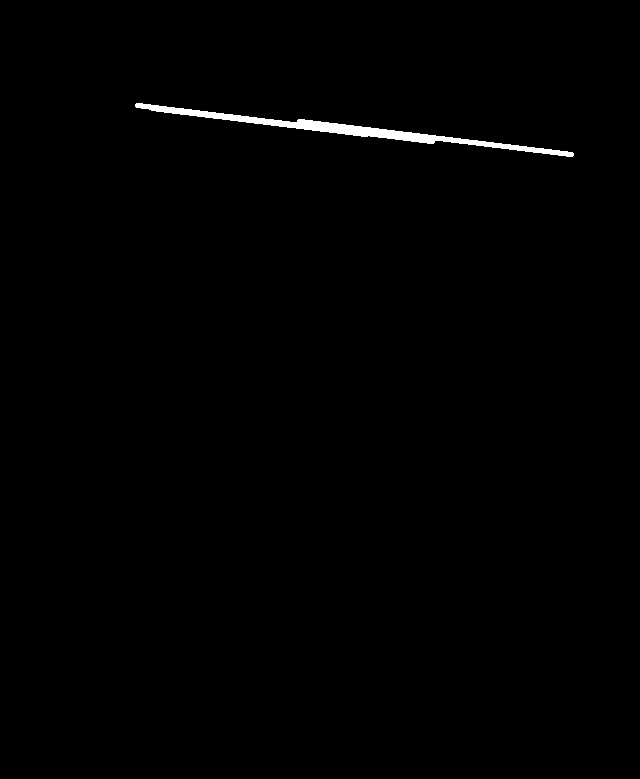

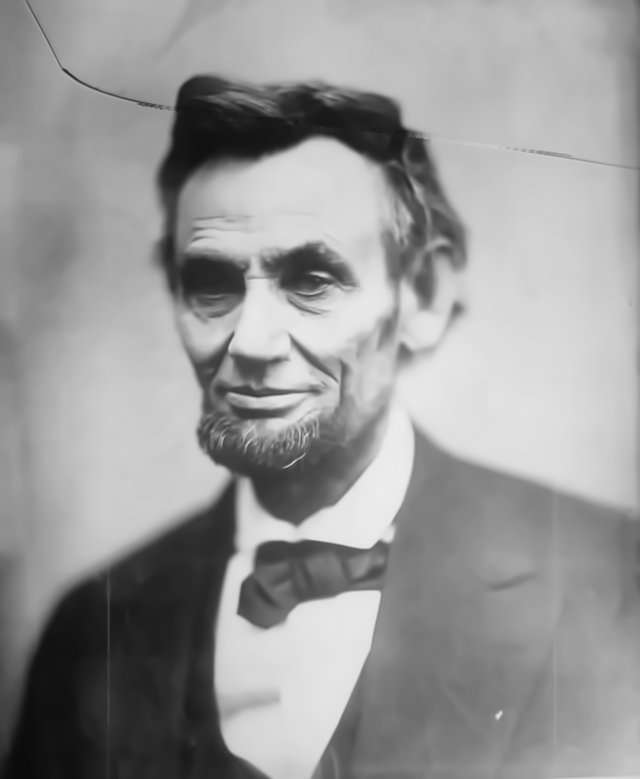

In [104]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def Automated_Crack_Fixing(image, minEdgeRange, maxEdgeRange, minDesiredLineLength,maxDesiredLineLength,maxLineGap, KernelSize,KernelSize2):
    image = image.astype("uint8")
    edges = cv2.Canny(image, minEdgeRange, maxEdgeRange)

    # Dilate the edges using a kernel (adjust the kernel size as needed)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (KernelSize, KernelSize))
    dilated_edges = cv2.dilate(edges, kernel)
    cv2_imshow(dilated_edges)
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(dilated_edges, 1, np.pi/180, threshold=50, minLineLength=minDesiredLineLength, maxLineGap=maxLineGap)

    # Check if lines are detected

    filtered_lines = []
    if lines is not None:
      for line in lines:
          x1, y1, x2, y2 = line[0]
          if np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2])) < maxDesiredLineLength:
              filtered_lines.append(line[0])
        # Draw lines on the original image
      output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
      mask = np.zeros_like(output_image)
      for line in filtered_lines:
        x1, y1, x2, y2 = line
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.line(mask, (x1, y1), (x2, y2), 255, 2)

      # Display the result
      cv2_imshow(output_image)

      mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
      _, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

      kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (KernelSize2, KernelSize2))
      mask = cv2.dilate(mask, kernel2)
      cv2_imshow(mask)
      inpainting_method = cv2.INPAINT_TELEA  # Use the correct flag
      inpainted_image = cv2.inpaint(image, mask, inpainting_method, flags=cv2.INPAINT_TELEA)

      # Display the inpainted image
      cv2_imshow(inpainted_image)
    else:
        print("No lines detected.")

# Example usage
Automated_Crack_Fixing(denoised_image, 0,100,200,300,2, 5,3)


In [107]:
def Richardson_Lucy(kernel_size,Iterations):
  latent_image = np.ones_like(blurred_image)
  psf = np.ones((kernel_size,kernel_size)) /kernel_size**2
      # Richardson-Lucy algorithm
  for _ in range(Iterations):
      # Estimate the current blurred image
      estimated_blurred = convolve2d(latent_image, psf, mode='same', boundary='symm')

      # Compute the error
      error = blurred_image / (estimated_blurred + Noise)

      # Update the latent image
      latent_image *= convolve2d(error, np.flip(psf), mode='same', boundary='symm')
  return latent_image

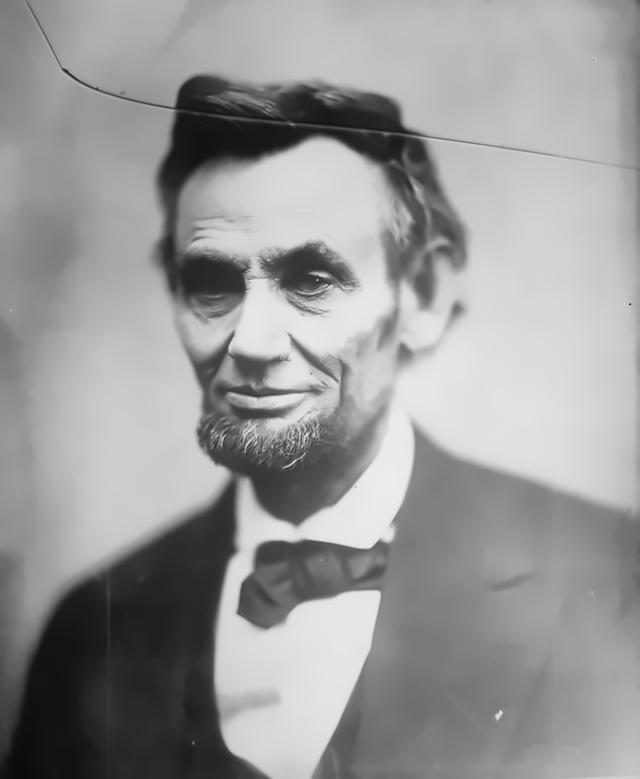

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('abraham.jpg', 0)
denoised_image = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)

cv2_imshow(denoised_image)

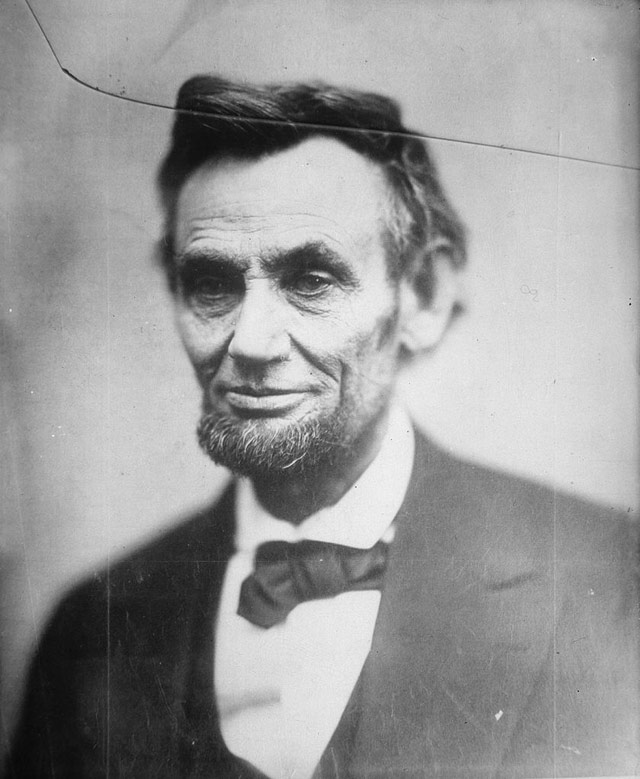

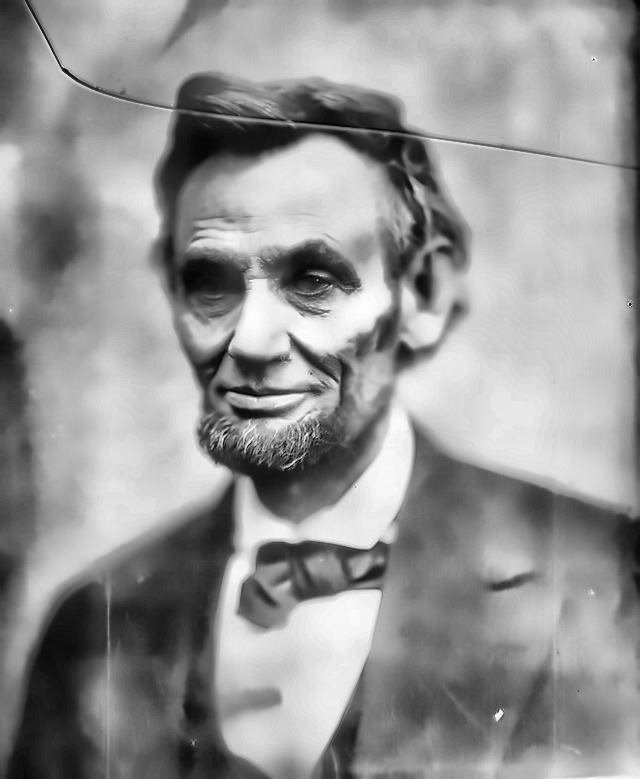

In [ ]:


clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(10, 10))
enhanced_image = clahe.apply(denoised_image)

cv2_imshow( image)
cv2_imshow( enhanced_image)




# Contrast Limited Adaptive Histogram Equalisation

# Denoising

# Power Law Transformations

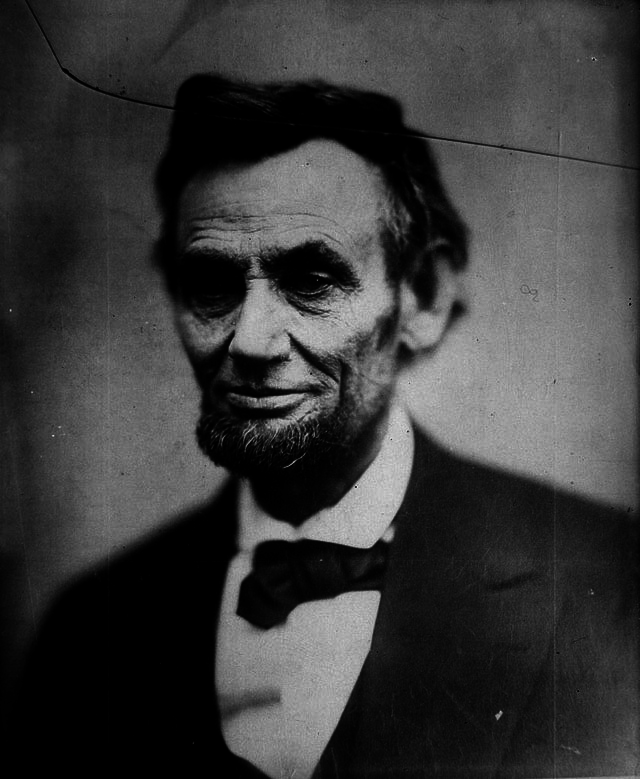

In [ ]:
gamma = 4.0


gamma_corrected = np.uint8(cv2.pow(image / 255.0, gamma) * 255.0)
cv2_imshow(gamma_corrected)

#Median Denoising

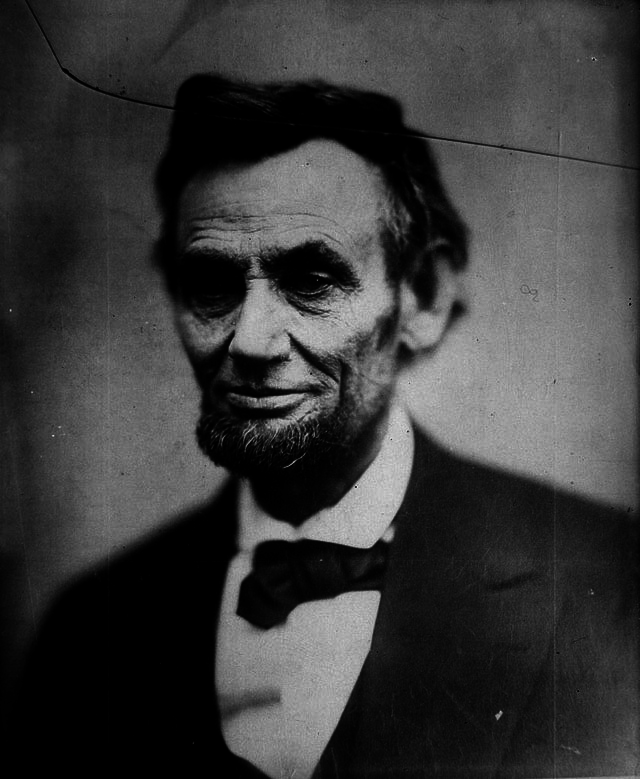

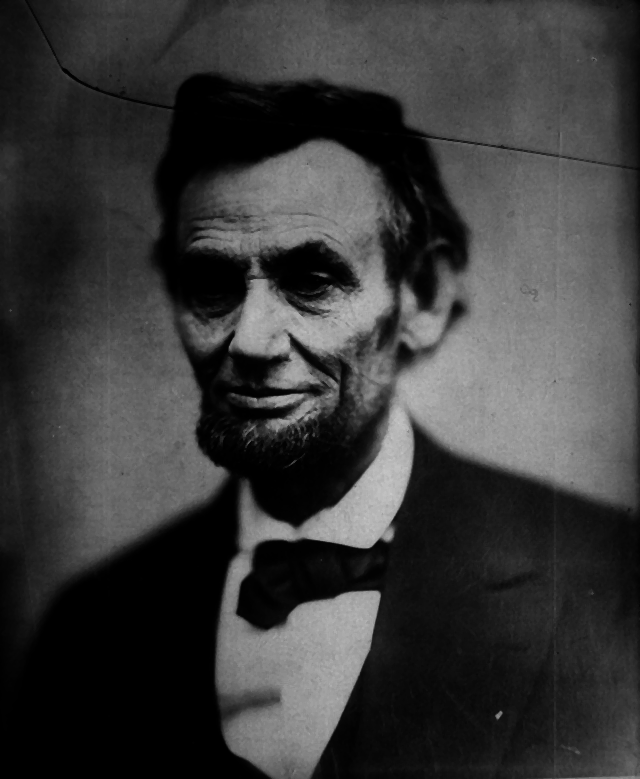

In [ ]:

blurred_image = cv2.medianBlur(gamma_corrected, 3)
cv2_imshow( gamma_corrected)
cv2_imshow( blurred_image)

# Gaussian Denoising

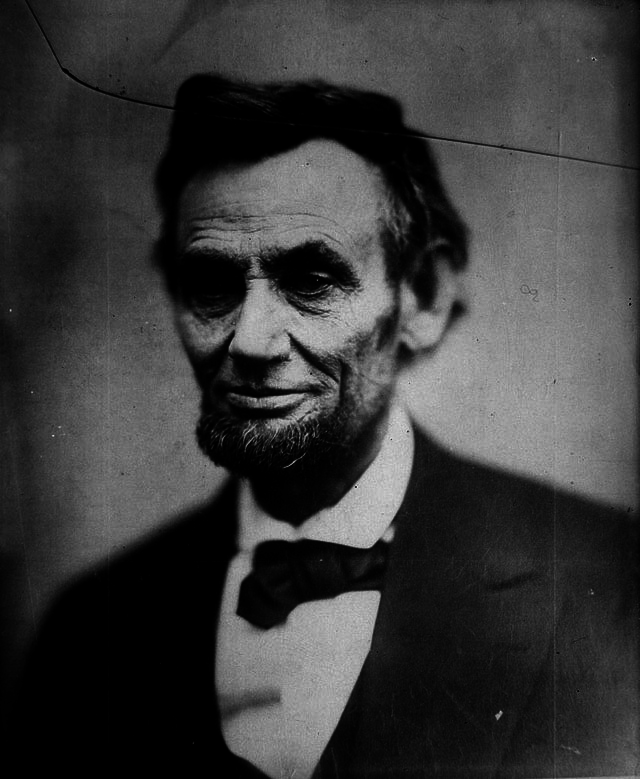

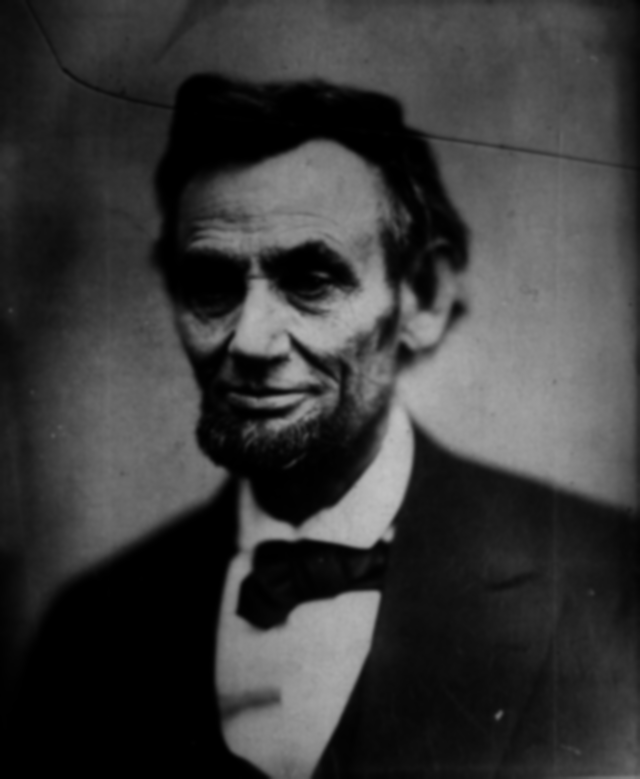

In [ ]:
import cv2





blurred_image = cv2.GaussianBlur(gamma_corrected, (9, 9), 0)


cv2_imshow(gamma_corrected)
cv2_imshow(blurred_image)



# Sharpening

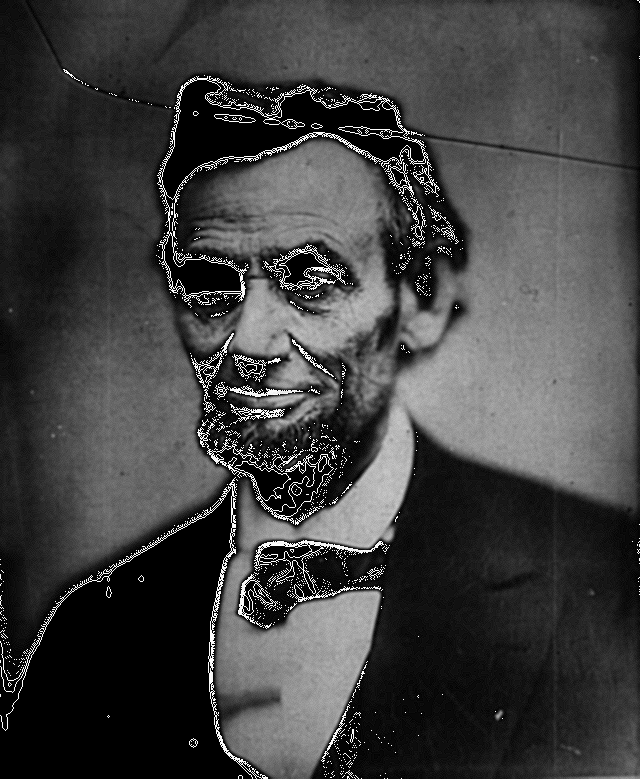

In [ ]:
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
sharpened = blurred_image- 3 * laplacian


sharpened = np.uint8(sharpened)
cv2_imshow( sharpened)

# Test

In [6]:
pip install bm3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00


In [7]:
import cv2
import bm3d
import numpy as np

def apply_bm3d_denoising(image, sigma=25):
    # Convert the image to grayscale if it's in color
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply BM3D denoising
    denoised_image = bm3d.bm3d(gray_image, sigma_psd=sigma, stage_arg=bm3d.BM3DStages.ALL_STAGES)

    return denoised_image

# Load the image (replace 'path/to/image.jpg' with the actual path)
image_path = 'abraham.jpg'
original_image = cv2.imread(image_path)

# Apply BM3D denoising
denoised_image = apply_bm3d_denoising(original_image)



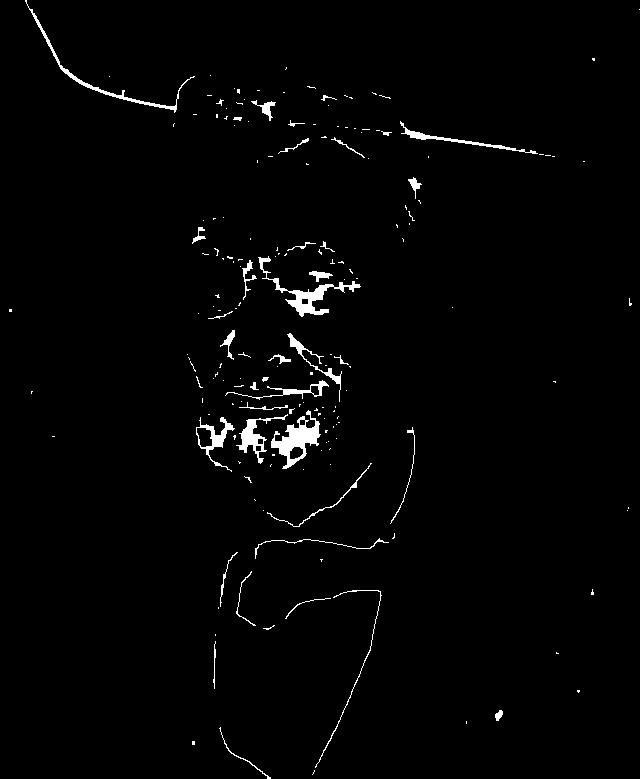

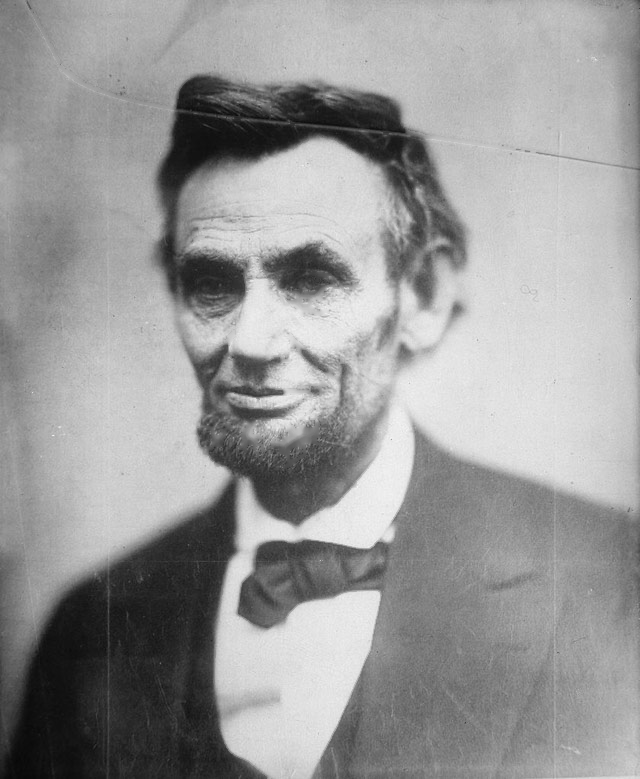

In [ ]:
def Automated_Crack_Fixing(image,minEdgeRange,maxEdgeRange,minDesiredLineLength,KernelSize):
  edges = cv2.Canny(image, minEdgeRange, maxEdgeRange)

  # Dilate the edges using a kernel (adjust the kernel size as needed)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (KernelSize, KernelSize))
  dilated_edges = cv2.dilate(edges, kernel)
  lines = cv2.HoughLinesP(dilated_edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=10)

  # Filter lines by length
  desired_length = minDesiredLineLength  # Set your desired line length
  filtered_lines = []
  if lines is not None:
      for line in lines:
          x1, y1, x2, y2 = line[0]
          if np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2])) > desired_length:
              filtered_lines.append(line[0])

  # Draw lines on the original image
  output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
  mask = np.zeros_like(output_image)
  for line in filtered_lines:
      x1, y1, x2, y2 = line
      cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
      cv2.line(mask, (x1, y1), (x2, y2), 255, 2)
  # Display the result
  cv2_imshow( output_image)

  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
  _, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

  inpainting_method = cv2.INPAINT_TELEA  # Use the correct flag
  inpainted_image = cv2.inpaint(denoised_image_uint8, mask, inpainting_method, flags=cv2.INPAINT_TELEA)
  print(1)
  cv2_imshow(inpainted_image)

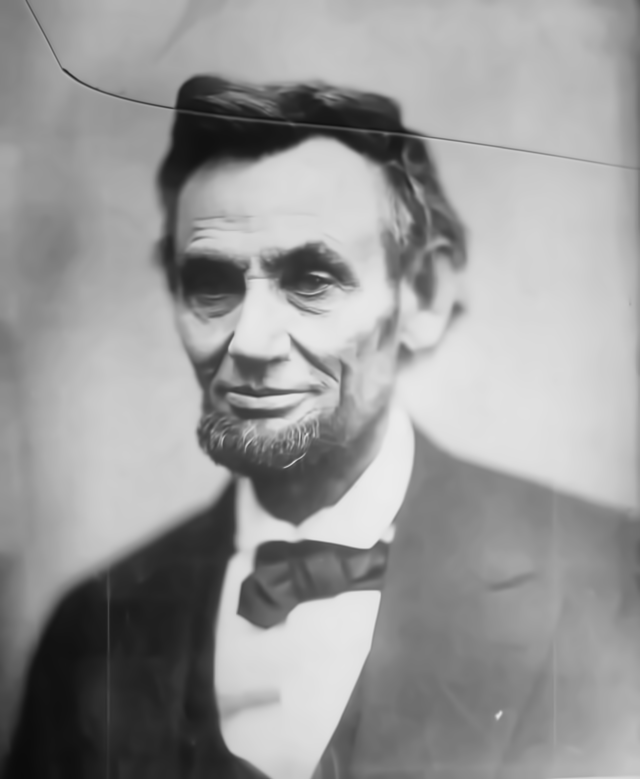

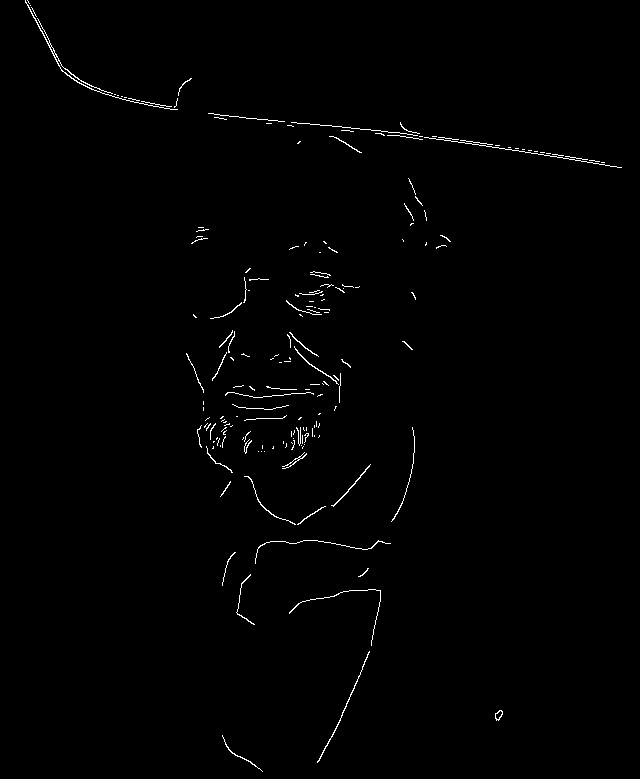

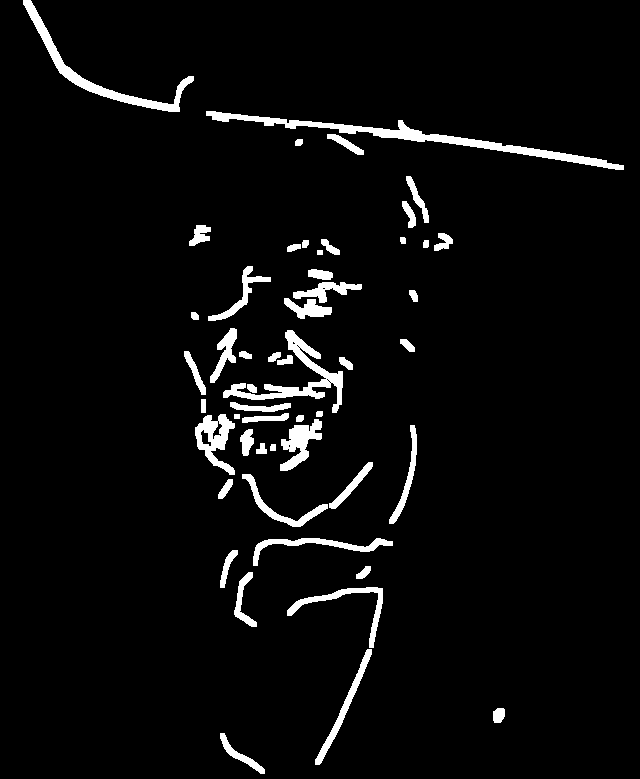

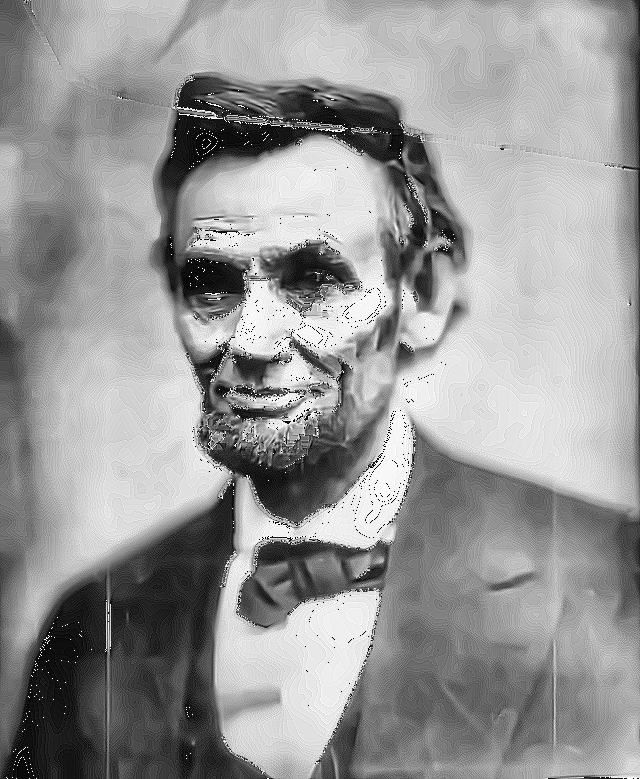

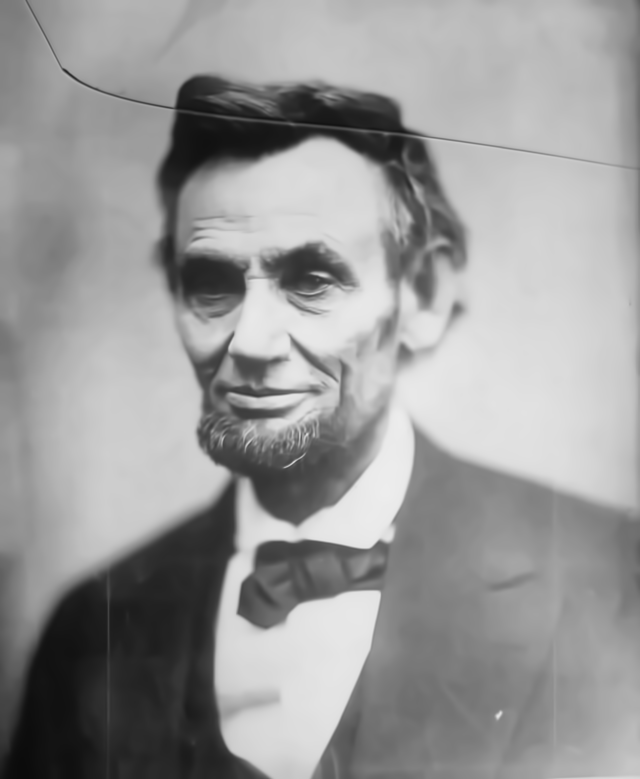

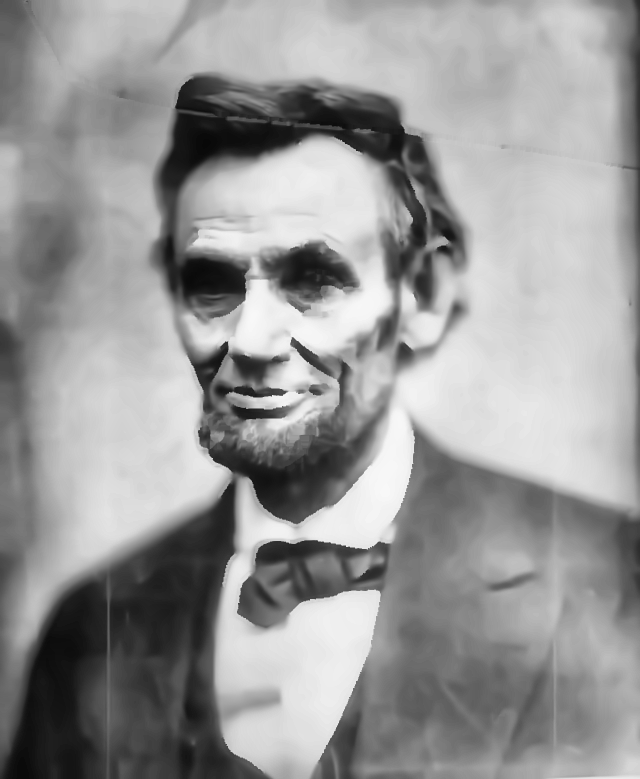

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np



# Display the original photo
cv2_imshow(denoised_image)

# Convert the photo to grayscale
gray_photo =cv2.convertScaleAbs(denoised_image)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_photo = clahe.apply(gray_photo)

# Apply Canny edge detection
edges = cv2.Canny(clahe_photo,240, 250)
cv2_imshow(edges)
# Dilate the edges using a kernel (adjust the kernel size as needed)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_edges = cv2.dilate(edges, kernel)
cv2_imshow(dilated_edges)
# Inpainting using Navier-Stokes based method in OpenCV
inpainting_method = cv2.INPAINT_NS  # Use the correct flag
inpainted_image = cv2.inpaint(clahe_photo, dilated_edges, inpainting_method, flags=cv2.INPAINT_NS)

laplacian = cv2.Laplacian(inpainted_image, cv2.CV_64F)
sharpened = inpainted_image- 3 * laplacian


sharpened = np.uint8(sharpened)
cv2_imshow( sharpened)
# Display the grayscale and CLAHE-enhanced photos
cv2_imshow(gray_photo)
cv2_imshow(inpainted_image)






# Deblurring

Iteration 0, Loss: 0.40119341015815735


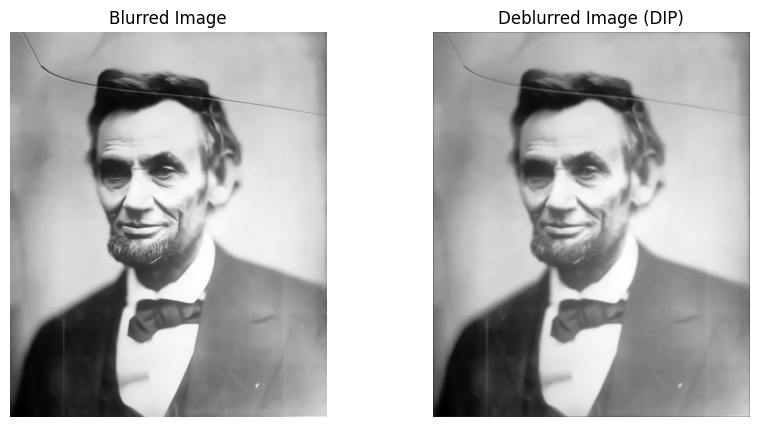

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the neural network model for deblurring
class DIPDeblurringModel(nn.Module):
    def __init__(self):
        super(DIPDeblurringModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)

        # Activation function
        self.activation = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.conv3(x)
        return x

# Load and preprocess the blurred image
blurred_image_path = 'blurred_image.jpg'  # Replace with your image path
blurred_image = gray_photo
blurred_image = blurred_image / 255.0
blurred_image_tensor = torch.from_numpy(blurred_image).unsqueeze(0).unsqueeze(0).float()

# Create DIP deblurring model
dip_deblurring_model = DIPDeblurringModel()

# Set up optimization
optimizer = optim.Adam(dip_deblurring_model.parameters(), lr=0.01)

# Training loop
num_iterations = 50
for iteration in range(num_iterations):
    optimizer.zero_grad()
    output_deblurred_tensor = dip_deblurring_model(blurred_image_tensor)
    loss = nn.MSELoss()(output_deblurred_tensor, blurred_image_tensor)
    loss.backward()
    optimizer.step()
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss.item()}")

# Get the final output deblurred image from the trained model
output_deblurred_image = output_deblurred_tensor.detach().squeeze().numpy()

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(output_deblurred_image, cmap='gray')
plt.title('Deblurred Image (DIP)')
plt.axis('off')
plt.show()


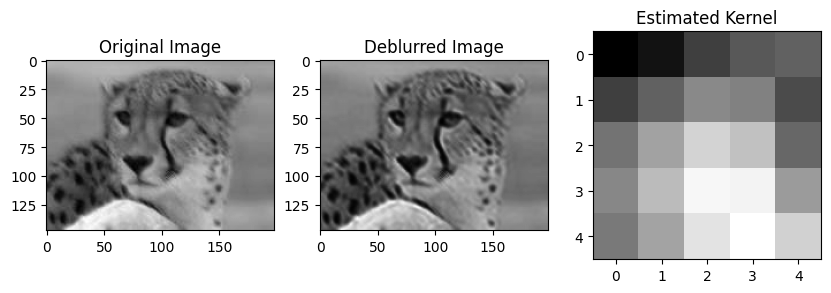

In [6]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def richardson_lucy_blind_deconvolution(image, num_iterations=5, kernel_size=(5, 5)):
    # Initialize the kernel and deblurred image
    kernel = np.ones(kernel_size) / np.prod(kernel_size)
    deblurred_image = image.copy()

    for _ in range(num_iterations):
        # Estimate the blur in the current deblurred image
        blurred_estimate = convolve2d(deblurred_image, kernel, 'same', 'symm')

        # Compute the error between the original image and the blurred estimate
        error = image / (blurred_estimate + 1e-10)

        # Update the deblurred image
        deblurred_image *= convolve2d(error, kernel[::-1, ::-1], 'same', 'symm')

        # Update the kernel
        kernel_update = convolve2d(image / (convolve2d(deblurred_image, kernel, 'same', 'symm') + 1e-10),
                                   deblurred_image[::-1, ::-1], 'full', 'symm')
        kernel_update = kernel_update[:kernel_size[0], :kernel_size[1]]
        kernel *= kernel_update

    return deblurred_image, kernel

# Example usage:
# Load a sample image (replace 'your_image_path.jpg' with the actual path to your image file)
image = plt.imread('cheetah.jpg')

# Convert the image to grayscale if needed
if image.ndim == 3:
    image = np.mean(image, axis=-1)

# Perform blind deconvolution
deblurred_image, estimated_kernel = richardson_lucy_blind_deconvolution(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(deblurred_image, cmap='gray'), plt.title('Deblurred Image')
plt.subplot(133), plt.imshow(estimated_kernel, cmap='gray'), plt.title('Estimated Kernel')
plt.show()


In [13]:
import numpy as np
import cv2
from scipy.signal import convolve2d

def richardson_lucy_blind_deconvolution_psf(image, num_iterations=10, psf_size=(5, 5)):
    # Initialize the PSF and deblurred image
    psf = np.ones(psf_size) / np.prod(psf_size)
    deblurred_image = image.copy()

    for _ in range(num_iterations):
        # Estimate the blurred image using the current PSF
        blurred_estimate = convolve2d(deblurred_image, psf, 'same', 'symm')

        # Compute the error between the original image and the blurred estimate
        error = image / (blurred_estimate + 1e-10)

        # Update the deblurred image
        deblurred_image *= convolve2d(error, psf[::-1, ::-1], 'same', 'symm')

        # Update the PSF
        psf_update = convolve2d(image / (convolve2d(deblurred_image, psf, 'same', 'symm') + 1e-10),
                                deblurred_image[::-1, ::-1], 'full', 'symm')
        psf_update = psf_update[:psf_size[0], :psf_size[1]]
        psf += psf_update

        # Normalize the PSF to ensure it sums to 1
        psf /= np.sum(psf)

    return deblurred_image, psf
image = cv2.imread('cheetah.jpg')

# Convert the image to grayscale if needed
if image.ndim == 3:
    image = np.mean(image, axis=-1)

# Perform blind deconvolution
deblurred_image, estimated_kernel = richardson_lucy_blind_deconvolution(image)

# Display the results


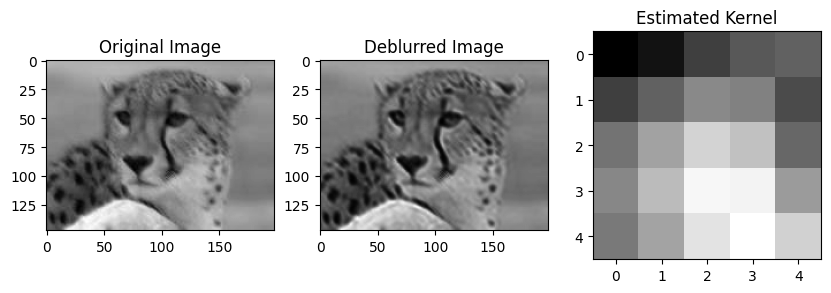

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(deblurred_image, cmap='gray'), plt.title('Deblurred Image')
plt.subplot(133), plt.imshow(estimated_kernel, cmap='gray'), plt.title('Estimated Kernel')
plt.show()

In [14]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Assuming that 'original_image' and 'denoised_image' are already loaded

# Display the original and denoised images
cv2_imshow(original_image)
cv2_imshow(denoised_image)

# Convert denoised_image to 8-bit unsigned integer
denoised_image_uint8 = cv2.convertScaleAbs(denoised_image)

# Apply Canny edge detection
edges = cv2.Canny(denoised_image_uint8, 30, 100)

# Dilate the edges using a kernel (adjust the kernel size as needed)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_edges = cv2.dilate(edges, kernel)

# Inpainting using Navier-Stokes based method in OpenCV
inpainting_method = cv2.INPAINT_NS  # Use the correct flag
inpainted_image = cv2.inpaint(denoised_image_uint8, dilated_edges, inpainting_method, flags=cv2.INPAINT_NS)

# Display the results
cv2_imshow(edges)
cv2_imshow(dilated_edges)
cv2_imshow(inpainted_image)

########################################


#USE HOUGH TRANSFORM OR PROVIDE A BRUSH. BRUSH MORE ACCURATE



#  image=denoised_image_uint8

# # Apply Canny edge detector
# edges = cv2.Canny(image, 30, 150, apertureSize=3)

# Apply Probabilistic Hough Transform
# Apply Canny edge detection
edges = cv2.Canny(denoised_image_uint8, 30, 100)

# Dilate the edges using a kernel (adjust the kernel size as needed)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_edges = cv2.dilate(edges, kernel)
lines = cv2.HoughLinesP(dilated_edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=10)

# Filter lines by length
desired_length = 400  # Set your desired line length
filtered_lines = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2])) > desired_length:
            filtered_lines.append(line[0])

# Draw lines on the original image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
mask = np.zeros_like(output_image)
for line in filtered_lines:
    x1, y1, x2, y2 = line
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.line(mask, (x1, y1), (x2, y2), 255, 2)
# Display the result
cv2_imshow( output_image)

mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

inpainting_method = cv2.INPAINT_TELEA  # Use the correct flag
inpainted_image = cv2.inpaint(denoised_image_uint8, mask, inpainting_method, flags=cv2.INPAINT_TELEA)
print(1)
cv2_imshow(inpainted_image)








NameError: ignored

In [ ]:
import cv2
import numpy as np

def apply_noise(image, intensity=0.1):
    noise = np.random.normal(scale=intensity, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

def apply_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_sepia(image):
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                            [0.349, 0.686, 0.168],
                            [0.272, 0.534, 0.131]])

    sepia_image = cv2.transform(image, sepia_matrix)
    sepia_image = np.clip(sepia_image, 0, 255).astype(np.uint8)
    return sepia_image

def apply_vignette(image, intensity=0.5):
    height, width = image.shape[:2]
    Y, X = np.ogrid[:height, :width]

    mask = ((X - width / 2) / (width / 2))**2 + ((Y - height / 2) / (height / 2))**2 > 1

    image[mask] *= intensity

    return image

def apply_scratches(image, num_scratches=10, length_range=(10, 50), intensity=50):
    for _ in range(num_scratches):
        start_point = (np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1]))
        angle = np.random.uniform(0, 360)
        length = np.random.randint(*length_range)
        end_point = (int(start_point[0] + length * np.cos(np.radians(angle))),
                     int(start_point[1] + length * np.sin(np.radians(angle))))

        cv2.line(image, start_point, end_point, (0, 0, 0), intensity)

    return image

def apply_spots(image, num_spots=100, radius_range=(1, 5), intensity=30):
    for _ in range(num_spots):
        center = (np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1]))
        radius = np.random.randint(*radius_range)

        cv2.circle(image, center, radius, (0, 0, 0), intensity, -1)

    return image

def apply_tears(image, num_tears=5, length_range=(20, 100), intensity=50):
    for _ in range(num_tears):
        start_point = (np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1]))
        angle = np.random.uniform(0, 360)
        length = np.random.randint(*length_range)
        end_point = (int(start_point[0] + length * np.cos(np.radians(angle))),
                     int(start_point[1] + length * np.sin(np.radians(angle))))

        cv2.line(image, start_point, end_point, (0, 0, 0), intensity)

    return image

def apply_creases(image, num_creases=3, intensity=30):
    for _ in range(num_creases):
        y1, x1 = np.random.randint(0, image.shape[0]), 0
        y2, x2 = np.random.randint(0, image.shape[0]), image.shape[1]

        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 0), intensity)

    return image

def apply_stains(image, num_stains=20, radius_range=(5, 20), intensity=30):
    for _ in range(num_stains):
        center = (np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1]))
        radius = np.random.randint(*radius_range)

        cv2.circle(image, center, radius, (0, 0, 0), intensity, -1)

    return image




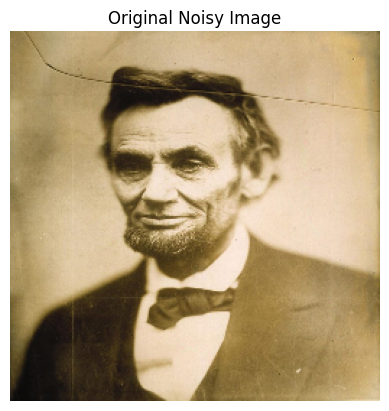

Iteration 0, Loss: 0.378905326128006
Iteration 100, Loss: 0.0015914923278614879
Iteration 200, Loss: 0.000948403961956501
Iteration 300, Loss: 0.0007458853651769459
Iteration 400, Loss: 0.0006916960119269788
Iteration 500, Loss: 0.0003148409887216985
Iteration 600, Loss: 0.00046489399392157793
Iteration 700, Loss: 0.00016602117102593184
Iteration 800, Loss: 0.0001266899926122278
Iteration 900, Loss: 0.00012401612184476107


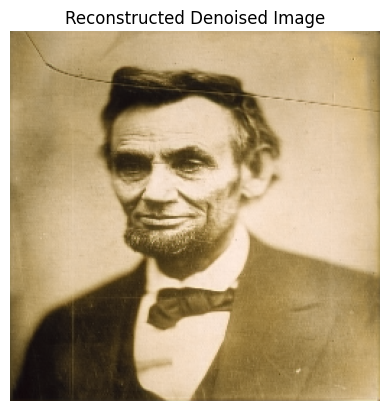

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the neural network model
class DIPDenoisingModel(nn.Module):
    def __init__(self):
        super(DIPDenoisingModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

        # Activation function
        self.activation = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.conv3(x)
        return x

# Load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    image_tensor = torch.from_numpy(image).permute(2, 0, 1).float().unsqueeze(0)
    return image_tensor.squeeze()

# Display an image using matplotlib
def display_image(image, title):
    if isinstance(image, torch.Tensor):
        # Convert PyTorch tensor to NumPy array for visualization
        image = image.permute(1, 2, 0).numpy()

    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


# Define hyperparameters
num_iterations = 500
learning_rate = 0.01

# Create DIP denoising model
dip_denoising_model = DIPDenoisingModel()

# Load and preprocess the actual noisy image
actual_noisy_image_path = 'abraham.jpg'  # Replace with your image path
actual_noisy_image_tensor = load_and_preprocess_image(actual_noisy_image_path)

# Display the original noisy image
display_image(actual_noisy_image_tensor, 'Original Noisy Image')

# Convert the actual noisy image to PyTorch tensor
input_noisy_tensor = actual_noisy_image_tensor

# Set up optimization
optimizer = optim.Adam(dip_denoising_model.parameters(), lr=learning_rate)

# Training loop
for iteration in range(num_iterations):
    optimizer.zero_grad()
    output_denoised_tensor = dip_denoising_model(input_noisy_tensor)
    loss = nn.MSELoss()(output_denoised_tensor, input_noisy_tensor)
    loss.backward()
    optimizer.step()
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss.item()}")

# Get the final output denoised image from the trained model
output_denoised_image = output_denoised_tensor.detach().squeeze().permute(1, 2, 0).numpy()

# Display the reconstructed denoised image
display_image(output_denoised_image, 'Reconstructed Denoised Image')


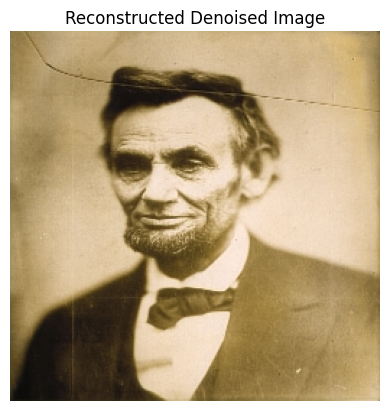

In [ ]:
def display_image(image, title):
    if image.shape[0] == 1:
        # Grayscale image
        plt.imshow(image.squeeze(), cmap='gray')
    else:
        # RGB image
        plt.imshow(image.squeeze())
    plt.title(title)
    plt.axis('off')
    plt.show()
display_image(output_denoised_image, 'Reconstructed Denoised Image')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the neural network model
class DeepImagePriorSRModel(nn.Module):
    def __init__(self):
        super(DeepImagePriorSRModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

        # Activation function (e.g., leaky relu)
        self.activation = nn.LeakyReLU(0.2)

    def forward(self, x):
        # Forward pass through the network
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.conv3(x)
        return x

# Generate a random low-resolution image as input
def generate_low_resolution_image(height, width, channels=3):
    return np.random.rand(channels, height, width)

# Convert a NumPy array to a PyTorch tensor
def numpy_to_tensor(image):
    return torch.from_numpy(image).float().unsqueeze(0)

# Display an image using matplotlib
def display_image(image, title):
    plt.imshow(image.transpose(1, 2, 0))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define hyperparameters
image_height = 128
image_width = 128
num_iterations = 1000
learning_rate = 0.01

# Create Deep Image Prior super-resolution model
dip_sr_model = DeepImagePriorSRModel()

# Generate a random low-resolution image as input
input_low_resolution_image = generate_low_resolution_image(image_height, image_width)

# Convert input low-resolution image to PyTorch tensor
input_low_resolution_tensor = numpy_to_tensor(input_low_resolution_image)

# Set up optimization
optimizer = optim.Adam(dip_sr_model.parameters(), lr=learning_rate)

# Training loop
for iteration in range(num_iterations):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    output_high_resolution_tensor = dip_sr_model(input_low_resolution_tensor)

    # Loss (mean squared error)
    loss = nn.MSELoss()(output_high_resolution_tensor, input_low_resolution_tensor)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # Print the loss every few iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss.item()}")

# Get the final output high-resolution image from the trained model
output_high_resolution_image = output_high_resolution_tensor.detach().numpy().squeeze()

# Display the original low-resolution and reconstructed high-resolution images
display_image(input_low_resolution_image, 'Original Low-Resolution Image')
display_image(output_high_resolution_image, 'Reconstructed High-Resolution Image')


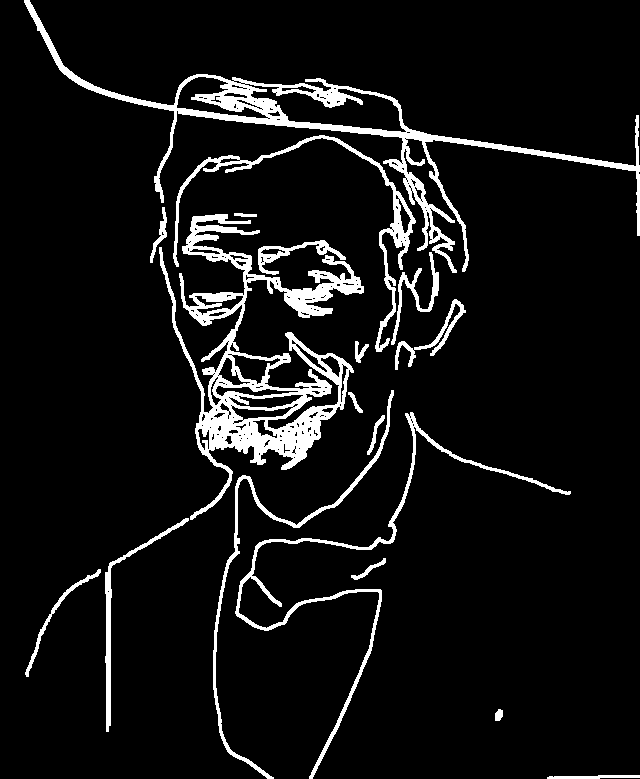

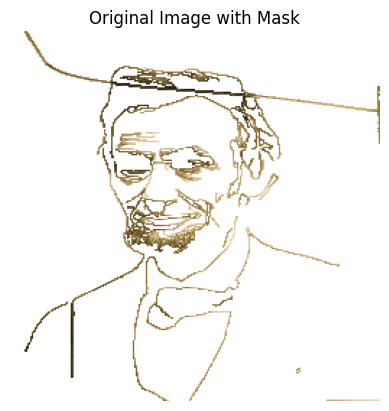

Iteration 0, Loss: 0.3269924521446228
Iteration 100, Loss: 0.005169588141143322
Iteration 200, Loss: 0.001681563095189631


KeyboardInterrupt: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the neural network model
class DIPInpaintingModel(nn.Module):
    def __init__(self):
        super(DIPInpaintingModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(4, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 4, kernel_size=3, stride=1, padding=1)

        # Activation function
        self.activation = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.conv3(x)
        return x

# Load and preprocess an image with a binary mask
def load_and_preprocess_image_with_mask(image_path, target_size=(256, 256)):

    image = cv2.imread(image_path)
    gsimage= cv2.imread(image_path,0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    denoised_image = apply_bm3d_denoising(gsimage)
    denoised_image_uint8 = cv2.convertScaleAbs(denoised_image)
    mask = cv2.Canny(denoised_image_uint8, 30, 100)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated_edges = cv2.dilate(edges, kernel)
    mask=dilated_edges
    cv2_imshow(mask)
    mask = cv2.resize(mask, target_size)
    mask = (mask > 128).astype(np.float32)  # Threshold the mask

    # Combine image and mask along the channels dimension
    image_with_mask = np.concatenate([image, mask[..., None]], axis=-1)

    image_tensor = torch.from_numpy(image_with_mask).permute(2, 0, 1).float().unsqueeze(0)
    return image_tensor

# Display an image using matplotlib
def display_image(image, title):
    plt.imshow(image.squeeze().permute(1, 2, 0))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define hyperparameters
num_iterations = 1000
learning_rate = 0.01

# Create DIP inpainting model
dip_inpainting_model = DIPInpaintingModel()

# Load and preprocess the image with a binary mask
image_path = 'abraham.jpg'  # Replace with your image path
mask_path = 'path/to/your/mask.png'  # Replace with your mask path
image_with_mask_tensor = load_and_preprocess_image_with_mask(image_path)

# Display the original image with mask
display_image(image_with_mask_tensor, 'Original Image with Mask')

# Convert the image with mask to PyTorch tensor
input_tensor = image_with_mask_tensor

# Set up optimization
optimizer = optim.Adam(dip_inpainting_model.parameters(), lr=learning_rate)

# Training loop
for iteration in range(num_iterations):
    optimizer.zero_grad()
    output_tensor = dip_inpainting_model(input_tensor)
    loss = nn.MSELoss()(output_tensor, input_tensor)
    loss.backward()
    optimizer.step()
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss.item()}")

# Get the final output inpainted image from the trained model
output_image_with_mask = output_tensor.detach().squeeze().permute(1, 2, 0).numpy()

# Display the reconstructed inpainted image
display_image(output_image_with_mask, 'Reconstructed Inpainted Image')
